<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Classification with Python

Estimated time needed: **25** minutes

## Objectives

After completing this lab you will be able to:

-   Confidently create classification models


In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:


In [75]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about the performance of basketball teams. The **cbb.csv** data set includes performance data about five seasons of 354 basketball teams. It includes following fields:

| Field      | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| ---------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| TEAM       | The Division I college basketball school                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| CONF       | The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference) |
| G          | Number of games played                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| W          | Number of games won                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| ADJOE      | Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ADJDE      | Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| BARTHAG    | Power Rating (Chance of beating an average Division I team)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| EFG_O      | Effective Field Goal Percentage Shot                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| EFG_D      | Effective Field Goal Percentage Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| TOR        | Turnover Percentage Allowed (Turnover Rate)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| TORD       | Turnover Percentage Committed (Steal Rate)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| ORB        | Offensive Rebound Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| DRB        | Defensive Rebound Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| FTR        | Free Throw Rate (How often the given team shoots Free Throws)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| FTRD       | Free Throw Rate Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| 2P_O       | Two-Point Shooting Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| 2P_D       | Two-Point Shooting Percentage Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| 3P_O       | Three-Point Shooting Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| 3P_D       | Three-Point Shooting Percentage Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| ADJ_T      | Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| WAB        | Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| POSTSEASON | Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| SEED       | Seed in the NCAA March Madness Tournament                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| YEAR       | Season                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |


### Load Data From CSV File


Let's load the dataset [NB Need to provide link to csv file]


In [76]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/cbb.csv')
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [4]:
df.shape

(1406, 24)

## Add Column

Next we'll add a column that will contain "true" if the wins above bubble are over 7 and "false" if not. We'll call this column Win Index or "windex" for short. 


In [77]:
df['windex'] = np.where(df.WAB > 7, 'True', 'False')

# Data visualization and pre-processing


Next we'll filter the data set to the teams that made the Sweet Sixteen, the Elite Eight, and the Final Four in the post season. We'll also create a new dataframe that will hold the values with the new column.


In [78]:
df1 = df.loc[df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
df1.head(3)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True


In [79]:
df1['POSTSEASON'].value_counts()

S16    32
E8     16
F4      8
Name: POSTSEASON, dtype: int64

32 teams made it into the Sweet Sixteen, 16 into the Elite Eight, and 8 made it into the Final Four over 5 seasons. 


Lets plot some columns to underestand data better:


In [115]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

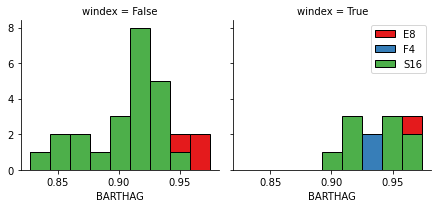

In [10]:
import seaborn as sns

bins = np.linspace(df1.BARTHAG.min(), df1.BARTHAG.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=6)
g.map(plt.hist, 'BARTHAG', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

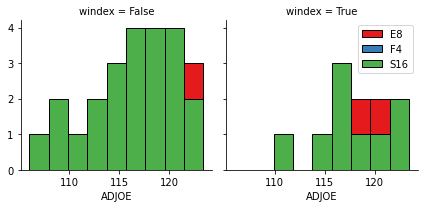

In [11]:
bins = np.linspace(df1.ADJOE.min(), df1.ADJOE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJOE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Lets look at how Adjusted Defense Efficiency plots


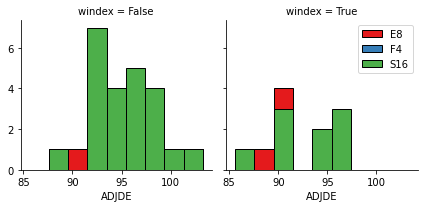

In [12]:
bins = np.linspace(df1.ADJDE.min(), df1.ADJDE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJDE', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that this data point doesn't impact the ability of a team to get into the Final Four. 


## Convert Categorical features to numerical values


Lets look at the postseason:


In [81]:
df1.groupby(['windex'])['POSTSEASON'].value_counts(normalize=True)

windex  POSTSEASON
False   S16           0.605263
        E8            0.263158
        F4            0.131579
True    S16           0.500000
        E8            0.333333
        F4            0.166667
Name: POSTSEASON, dtype: float64

13% of teams with 6 or less wins above bubble make it into the final four while 17% of teams with 7 or more do.


Lets convert wins above bubble (winindex) under 7 to 0 and over 7 to 1:


In [82]:
print(df1['windex'].head(3))
# you can only run this one, it throws an error if windex is already 0's and 1's
df1['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
df1.head(3)

2    False
3     True
4     True
Name: windex, dtype: object


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,0
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,1
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,1


### Feature selection


Lets defind feature sets, X:


In [83]:
X = df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
X[0:2]

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,windex
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,...,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,...,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,1


What are our lables? Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)|


In [84]:
y = df1['POSTSEASON'].values
y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split )


In [85]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:1]

array([[-0.43331874, -1.26140173,  0.28034482,  2.74329908, -2.45717765,
         0.10027963,  0.94171924, -1.16188145, -1.71391372,  0.12750511,
         1.33368704, -0.4942211 , -0.87998988,  0.02784185,  0.00307239,
         0.22576157,  1.59744386, -1.12106011, -1.0448016 ,  0.49716104,
        -0.6882472 ]])

## Training and Validation


Split the data into Training and Validation data.


In [86]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_val.shape,  y_val.shape)

Train set: (44, 21) (44,)
Validation set: (12, 21) (12,)


# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the validation set  to report the accuracy of the model
You should use the following algorithm:

-   K Nearest Neighbor(KNN)
-   Decision Tree
-   Support Vector Machine
-   Logistic Regression


# K Nearest Neighbor(KNN)

<b>Question  1 </b> Build a KNN model using a value of k equals five, find the accuracy on the validation data (X_val and y_val)


You can use <code> accuracy_score</cdoe>


In [87]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

yhat = neigh.predict(X_val)

print("Train set Accuracy: ", accuracy_score(y_train, neigh.predict(X_train)))
print("Validation set Accuracy: ", accuracy_score(y_val, yhat))


Train set Accuracy:  0.6363636363636364
Validation set Accuracy:  0.6666666666666666


<b>Question  2</b> Determine and print the accuracy for the first 15 values of k the on the validation data:


In [88]:
# print("Validation set Accuracy: ", accuracy_score(y_val[0:15], yhat[0:15]))

for k in range(1, 16):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = neigh.predict(X_val)
    print(accuracy_score(y_val, yhat))

0.3333333333333333
0.3333333333333333
0.5
0.5833333333333334
0.6666666666666666
0.5833333333333334
0.5833333333333334
0.6666666666666666
0.5833333333333334
0.5833333333333334
0.5833333333333334
0.5
0.5833333333333334
0.5833333333333334
0.5833333333333334


# Decision Tree


The following lines of code fit a <code>DecisionTreeClassifier</code>:


In [89]:
from sklearn.tree import DecisionTreeClassifier

<b>Question  3</b> Determine the minumum   value for the parameter <code>max_depth</code> that improves results 


In [90]:
score = []
for i in range(1, 1001):
    F4Tree = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    F4Tree.fit(X_train,y_train)
    predTree = F4Tree.predict(X_val)
    score.append(accuracy_score(y_val, predTree))

text = " is the minumum value for the parameter max_depth that improves results with an accuracy of "
#print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_val, predTree))
print(score.index(max(score)) + 1, text, max(score), ".", sep = '')

1 is the minumum value for the parameter max_depth that improves results with an accuracy of 0.6666666666666666.


# Support Vector Machine


<b>Question  4</b>Train the support  vector machine model and determine the accuracy on the validation data for each kernel. Find the kernel (linear, poly, rbf, sigmoid) that provides the best score on the validation data and train a SVM using it.


In [91]:
from sklearn import svm

In [92]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score


In [93]:
pdf = pd.DataFrame(columns=['kernel', 'f1', 'jaccard', 'accuracy'])
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
# Find the kernel (linear, poly, rbf, sigmoid) that provides the best score on the validation data
for k in kernel:
    clf = svm.SVC(kernel = k, gamma = 'auto')
    clf.fit(X_train, y_train) 
    yhat = clf.predict(X_val)
    f1 = f1_score(y_val, yhat, average='weighted') 
    jaccard = jaccard_score(y_val, yhat, average = "weighted")
    accuracy = accuracy_score(y_val, yhat)
    new_row = {'kernel': k, 'f1': f1, 'jaccard': jaccard, 'accuracy': accuracy}
    pdf.loc[len(pdf.index)] = [k, f1, jaccard, accuracy]

print('Results for all kernels:')
print(pdf, '\n')

max_kernel = pdf.loc[pdf['f1'].idxmax()]

# train a SVM using the best kernel
clf_opt = svm.SVC(kernel = max_kernel[0], gamma = 'auto')
clf_opt.fit(X_train, y_train) 
yhat_opt = clf_opt.predict(X_val)
f1_opt = f1_score(y_val, yhat_opt, average='weighted')
accuracy = accuracy_score(y_val, yhat_opt)
print('The kernel with the best score is \'', max_kernel[0], 
      '\' with an accuracy score of ', accuracy, sep = '')

Results for all kernels:
    kernel        f1   jaccard  accuracy
0   linear  0.242165  0.142045  0.250000
1     poly  0.533333  0.444444  0.666667
2      rbf  0.491228  0.388889  0.583333
3  sigmoid  0.444444  0.333333  0.500000 

The kernel with the best score is 'poly' with an accuracy score of 0.6666666666666666


# Logistic Regression


<b>Question 5</b> Train a logistic regression model and determine the accuracy of the validation data (set C=0.01)


In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

yhat = LR.predict(X_val)

# predict_proba returns estimates for all classes
yhat_prob = LR.predict_proba(X_val)

# jaccard index
from sklearn.metrics import jaccard_score

print("Logistic Regression")
print("Acurracy Score: ", accuracy_score(y_val, yhat))
print("Jaccard Score: ", jaccard_score(y_val, yhat, average = 'weighted'))


Logistic Regression
Acurracy Score:  0.5833333333333334
Jaccard Score:  0.49074074074074076


# Model Evaluation using Test set


In [96]:
from sklearn.metrics import f1_score
# for f1_score please set the average parameter to 'micro'
from sklearn.metrics import log_loss

In [97]:
def jaccard_index(predictions, true):
    if (len(predictions) == len(true)):
        intersect = 0;
        for x,y in zip(predictions, true):
            if (x == y):
                intersect += 1
        return intersect / (len(predictions) + len(true) - intersect)
    else:
        return -1

<b>Question  5</b> Calculate the  F1 score and Jaccard Similarity score for each model from above. Use the Hyperparameter that performed best on the validation data. **For f1_score please set the average parameter to 'micro'.**


### Load Test set for evaluation


In [98]:
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/basketball_train.csv',error_bad_lines=False)
test_df.head(3)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016


In [99]:
test_df['windex'] = np.where(test_df.WAB > 7, 'True', 'False')
test_df1 = test_df[test_df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
test_Feature = test_df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
test_Feature['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
test_X=test_Feature
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:3]

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


array([[-0.40807445, -1.10135297,  0.33736593,  2.66479976, -2.46831661,
         0.21370325,  0.94409055, -1.19216365, -1.64348924,  0.0145406 ,
         1.29523097, -0.62353318, -0.93178856,  0.14278437,  0.1688762 ,
         0.28450084,  1.62625961, -0.83664926, -0.99850054,  0.48431917,
        -0.6770032 ],
       [ 0.36395829,  0.32632681,  0.70314507, -0.71377864,  1.07370841,
         0.48263317,  0.47749894, -1.32975879, -0.06861933, -0.73544815,
        -1.35447914, -0.80682902,  0.34173776,  0.04966413,  0.09405763,
         1.37214061,  0.69385462, -2.00860931,  0.98054997, -1.1940146 ,
         1.47709789],
       [ 0.36395829,  1.18293467,  0.93175703, -0.87858735,  1.23870131,
         0.78517934, -0.92227588,  0.52777566, -0.18673457, -0.11938596,
        -0.31763606,  0.6824497 ,  1.01292055,  0.08070421, -0.99081164,
         1.7471888 , -0.23855037,  0.66085525,  1.92295497, -1.1940146 ,
         1.47709789]])

In [100]:
test_y = test_df1['POSTSEASON'].values
test_y[0:3]

array(['E8', 'E8', 'E8'], dtype=object)

KNN


In [ ]:
# Question 5 Calculate the F1 score and Jaccard Similarity score for each model from above. 
# Use the Hyperparameter that performed best on the validation data. 
# For f1_score please set the average parameter to 'micro'.

In [101]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss


In [110]:
pdf = pd.DataFrame(columns=['Algorith', 'Accuracy', 'Jacccard', 'F1-Score', 'LogLoss'])


In [111]:

k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

yhat_KNN = neigh.predict(test_X)

# Calculate the F1 score and Jaccard Similarity score
f1 = f1_score(test_y, yhat_KNN, average='micro') 
jaccard = jaccard_score(test_y, yhat_KNN, average = "micro")
accuracy = accuracy_score(test_y, yhat_KNN)

pdf.loc[len(pdf.index)] = ['KNN', accuracy, jaccard, f1, None]
print(pdf)

#print("KNN validation set Accuracy: ")
#print('f1 =', f1)
#print('jaccard =', jaccard)

  Algorith  Accuracy  Jacccard  F1-Score LogLoss
0      KNN  0.628571  0.458333  0.628571    None


Decision Tree


In [112]:
# Calculate the F1 score and Jaccard Similarity score
F4Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 1)
F4Tree.fit(X_train,y_train)
yhat_Tree = F4Tree.predict(test_X)

# Calculate the F1 score and Jaccard Similarity score
f1 = f1_score(test_y, yhat_Tree, average='micro') 
jaccard = jaccard_score(test_y, yhat_Tree, average = "micro")
accuracy = accuracy_score(test_y, yhat_Tree)


pdf.loc[len(pdf.index)] = ['Decision Tree', accuracy, jaccard, f1, None]
print(pdf)


#print("Decision Tree Accuracy: ")
#print('f1 =', f1)
#print('jaccard =', jaccard)

        Algorith  Accuracy  Jacccard  F1-Score LogLoss
0            KNN  0.628571  0.458333  0.628571    None
1  Decision Tree  0.642857  0.473684  0.642857    None


SVM


In [113]:
clf_opt = svm.SVC(kernel = 'poly', gamma = 'auto')
clf_opt.fit(X_train, y_train) 
yhat_opt = clf_opt.predict(test_X)

# Calculate the F1 score and Jaccard Similarity score
f1 = f1_score(test_y, yhat_opt, average='micro') 
jaccard = jaccard_score(test_y, yhat_opt, average = "micro")
accuracy = accuracy_score(test_y, yhat_opt)

pdf.loc[len(pdf.index)] = ['SVM', accuracy, jaccard, f1, None]
print(pdf)

#print("SVM Accuracy: ")
#print('f1 =', f1)
#print('jaccard =', jaccard)

        Algorith  Accuracy  Jacccard  F1-Score LogLoss
0            KNN  0.628571  0.458333  0.628571    None
1  Decision Tree  0.642857  0.473684  0.642857    None
2            SVM  0.685714  0.521739  0.685714    None


Logistic Regression


In [114]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat_LR = LR.predict(test_X)

# predict_proba returns estimates for all classes
yhat_prob = LR.predict_proba(test_X)

# Calculate the F1 score and Jaccard Similarity score
f1 = f1_score(test_y, yhat_LR, average='micro') 
jaccard = jaccard_score(test_y, yhat_LR, average = "micro")
accuracy = accuracy_score(test_y, yhat_LR)
LL = log_loss(test_y, yhat_prob)

pdf.loc[len(pdf.index)] = ['Logistic Regression', accuracy, jaccard, f1, LL]
print(pdf)

#print("Logistic Regression Accuracy: ")
#print('f1 =', f1)
#print('jaccard =', jaccard)
#print('log loss =', LL)


              Algorith  Accuracy  Jacccard  F1-Score  LogLoss
0                  KNN  0.628571  0.458333  0.628571     None
1        Decision Tree  0.642857  0.473684  0.642857     None
2                  SVM  0.685714  0.521739  0.685714     None
3  Logistic Regression  0.685714  0.521739  0.685714  1.03719


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Accuracy | Jaccard  | F1-score | LogLoss |
| ------------------ | -------- | -------- | -------- | ------- |
| KNN                | 0.628571 | 0.458333 | 0.628571 | NA      |
| Decision Tree      | 0.642857 | 0.473684 | 0.642857 | NA      |
| SVM                | 0.685714 | 0.521739 | 0.685714 | NA      |
| LogisticRegression | 0.685714 | 0.521739 | 0.685714 | 1.03719 |


Something to keep in mind when creating models to predict the results of basketball tournaments or sports in general is that is quite hard due to so many factors influencing the game. Even in sports betting an accuracy of 55% and over is considered good as it indicates profits.


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio">Watson Studio</a>


### Thank you for completing this lab!

## Author

Saeed Aghabozorgi

### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab |
|                   |         |            |                                    |
|                   |         |            |                                    |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
